In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("../../Data/Raw/flightLogData.csv")
data['States'] = 0

In [3]:
data.head()

,Time,Altitude,Vertical_velocity,Vertical_acceleration,Gravitational_acceleration,States
0,0.00,0.000000,0.000000,-7.6787,9.7757,0
1,0.01,0.000000,0.000000,-3.7418,9.7757,0
2,0.02,0.000000,0.000000,-1.2441,9.7757,0
3,0.03,0.000000,0.000000,0.5562,9.7757,0
4,0.04,0.000028,0.005567,2.3568,9.7757,0


In [4]:
def plot(df, path="../../Output/Figures/detectApogee1.jpeg"):
    plt.figure(figsize=(20, 10))
    plt.plot(df.Time, df['States'],  linewidth=2, color="g", label="States")
    plt.plot(df.Time, df['Altitude'],  linewidth=2, color="r", label="Altitude")
    plt.plot(df.Time, df['Vertical_velocity'],  linewidth=2, color="y", label="Vertical_velocity")
    plt.plot(df.Time, df['Vertical_acceleration'],  linewidth=2, color="b", label="Vertical_acceleration")
    plt.legend()
    plt.savefig(path, transparent=False)
    plt.show()

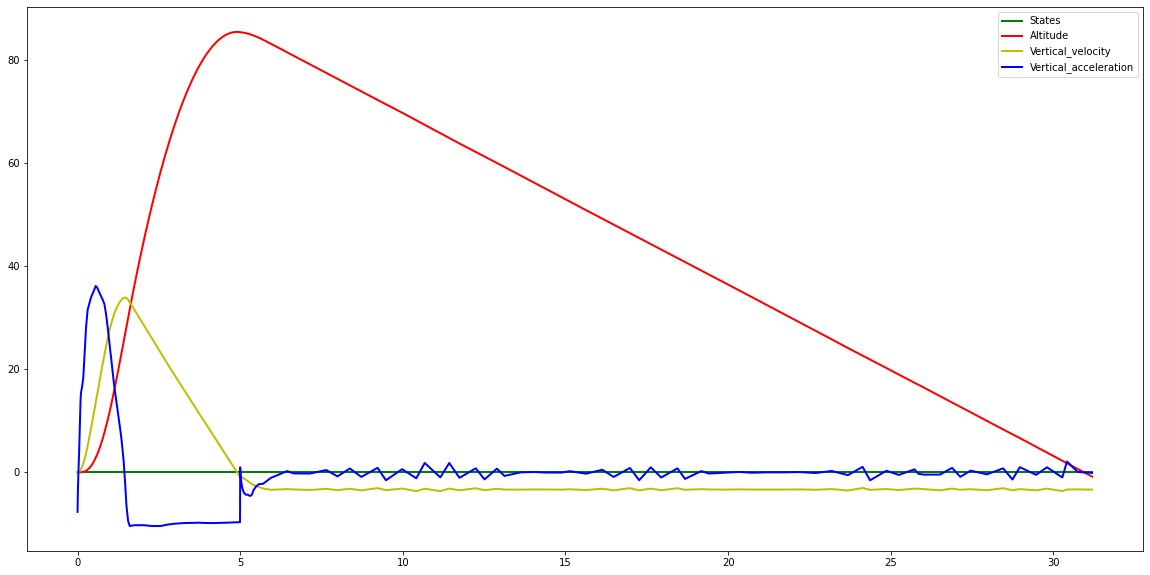

In [5]:
plot(df=data, path="../../Output/Figures/detectApogee1.jpeg")

## Apogee 4.9947 seconds

In [6]:
class CHECKSTATE:
    def __init__(self):
        self.BASE_ALTITUDE = 0
        self.MAX_ALTITUDE = 0
    
    def checkInflight(self, altitude):
        displacement = altitude - self.BASE_ALTITUDE
        if (displacement > 20):
            return 1
        else:
            return 0

    def checkApogee(self, velocity, altitude):
        if (velocity < 0):
            self.MAX_ALTITUDE = altitude
            return 2
        else:
            return 1


    def checkDescent(self, altitude):
        displacement = altitude - self.MAX_ALTITUDE
        if (displacement < 20):
            return 3
        else:
            return 2

    def checkGround(self, altitude):
        displacement = altitude - self.BASE_ALTITUDE
        if (displacement < 20):
            return 4
        else:
            return 3
        
    def run(self, altitude, velocity, state):
        if state == 0:
            return self.checkInflight(altitude)
        elif state == 1:
            return self.checkApogee(velocity, altitude)
        elif state == 2:
            return self.checkDescent(altitude)
        elif state == 3:
            return self.checkGround(altitude)
        elif state == 4:
            return 4
        else:
            return self.checkInflight(altitude)

In [7]:
mycheck = CHECKSTATE()
states = [0]
for i in range(len(data['Altitude'])):
    states.append(mycheck.run(data['Altitude'][i], data['Vertical_velocity'][i], states[-1]))

In [8]:
data['States'] = states[1:]

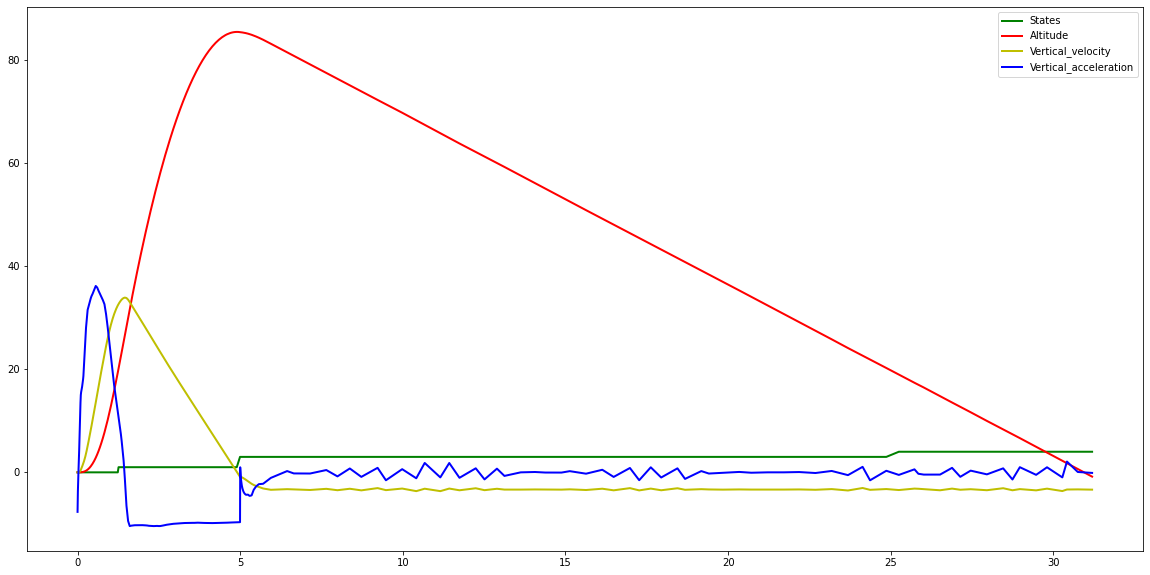

In [9]:
plt.figure(figsize=(20, 10))
plt.plot(data.Time, data['States'],  linewidth=2, color="g", label="States")
plt.plot(data.Time, data['Altitude'],  linewidth=2, color="r", label="Altitude")
plt.plot(data.Time, data['Vertical_velocity'],  linewidth=2, color="y", label="Vertical_velocity")
plt.plot(data.Time, data['Vertical_acceleration'],  linewidth=2, color="b", label="Vertical_acceleration")
plt.legend()
plt.savefig("error1.jpeg", transparent=False)
plt.show()

In [10]:
def detect_apogee(df):
    mycheck = CHECKSTATE()
    states = [0]
    for i in range(len(df['Altitude'])):
        latest_state = states[-1]
        current_state = mycheck.run(df['Altitude'][i], df['Vertical_velocity'][i], latest_state)
        states.append(current_state)
        if current_state == 2:
            print("Apogee at : " + str(df['Time'][i]))
    df['States'] = states[1:]

In [11]:
detect_apogee(df=data)

Apogee at : 4.9447


In [12]:
temp_df = data[['Altitude', "Vertical_velocity", "Vertical_acceleration"]]
temp_df.head()

,Altitude,Vertical_velocity,Vertical_acceleration
0,0.000000,0.000000,-7.6787
1,0.000000,0.000000,-3.7418
2,0.000000,0.000000,-1.2441
3,0.000000,0.000000,0.5562
4,0.000028,0.005567,2.3568


In [13]:
noise = np.random.normal(0, 1, temp_df.shape)
noisy_df = temp_df + noise
noisy_df.head()

,Altitude,Vertical_velocity,Vertical_acceleration
0,-0.292804,0.827106,-9.076719
1,0.565710,-1.136140,-3.916186
2,-0.888256,-0.977299,-1.495648
3,0.158028,-0.327124,0.102206
4,0.268632,-0.227988,2.824913


In [14]:
noisy_df['Time'] = data['Time']

In [15]:
noisy_df.head()

,Altitude,Vertical_velocity,Vertical_acceleration,Time
0,-0.292804,0.827106,-9.076719,0.00
1,0.565710,-1.136140,-3.916186,0.01
2,-0.888256,-0.977299,-1.495648,0.02
3,0.158028,-0.327124,0.102206,0.03
4,0.268632,-0.227988,2.824913,0.04


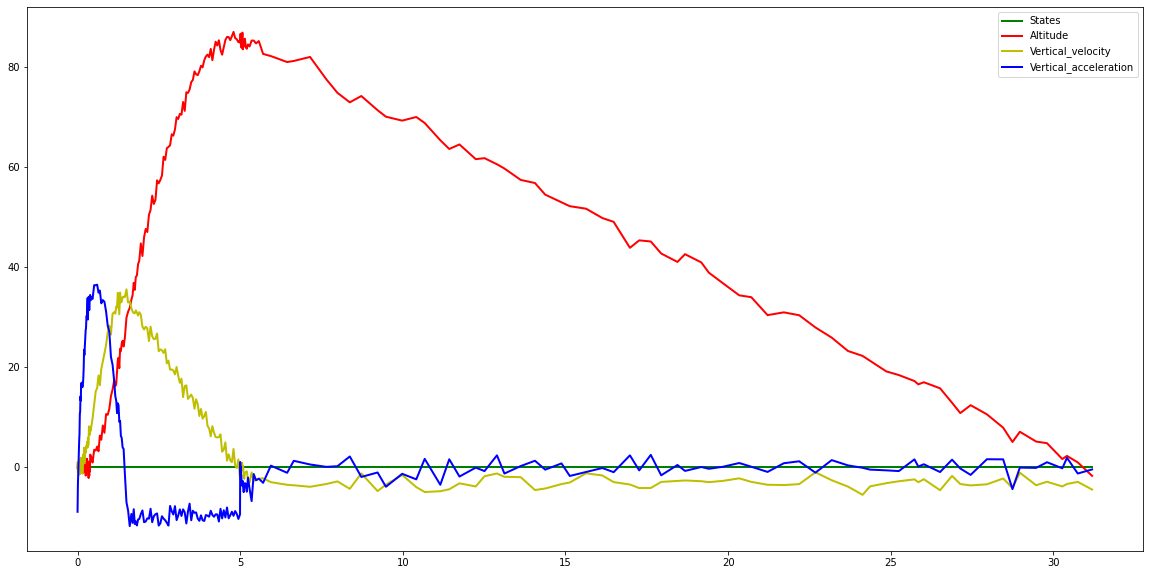

In [16]:
noisy_df['States'] = 0
plot(df=noisy_df, path="../../Output/Figures/detectApogee2.jpeg")

In [17]:
detect_apogee(df=noisy_df)

Apogee at : 4.8947


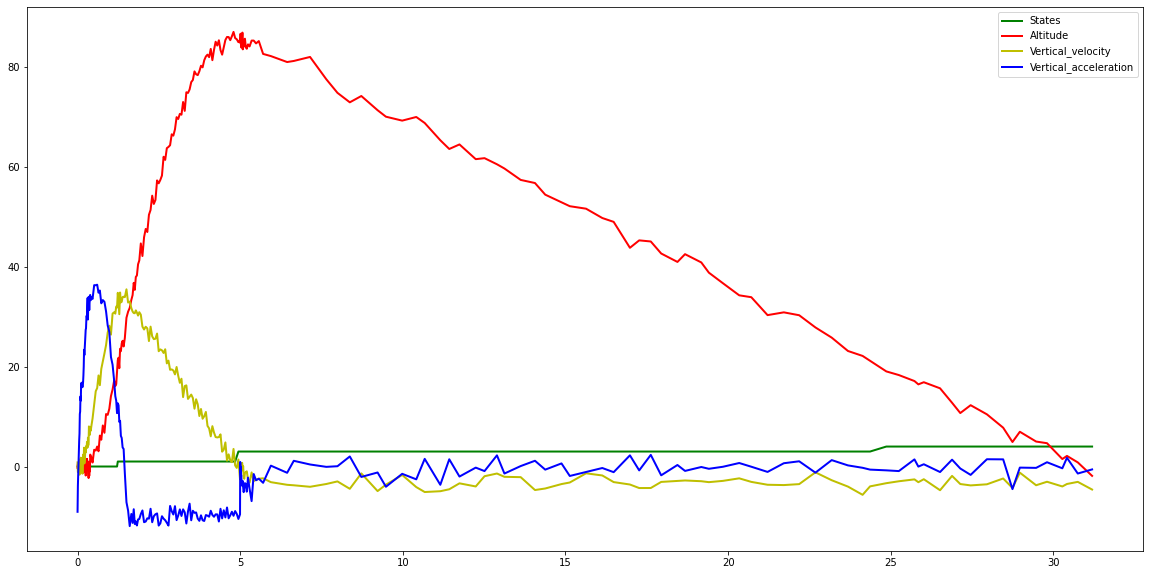

In [18]:
plot(df=noisy_df, path="../../Output/Figures/detectApogee2.jpeg")

## Standard deviation from 1 to 10

## Mean == 0

In [19]:
temp_df = data[['Altitude', "Vertical_velocity", "Vertical_acceleration"]]
for i in range(0, 10, 1):
    noise = np.random.normal(0, i, temp_df.shape)
    noisy_df = temp_df + noise
    noisy_df['Time'] = data['Time']
    detect_apogee(df=noisy_df)

Apogee at : 4.9447
Apogee at : 4.7947
Apogee at : 4.8447
Apogee at : 4.5447
Apogee at : 4.9447
Apogee at : 4.7447
Apogee at : 4.6447
Apogee at : 3.4947
Apogee at : 3.6447
Apogee at : 0.05


## Mean == 1

In [20]:
temp_df = data[['Altitude', "Vertical_velocity", "Vertical_acceleration"]]
for i in range(0, 10, 1):
    noise = np.random.normal(1, i, temp_df.shape)
    noisy_df = temp_df + noise
    noisy_df['Time'] = data['Time']
    detect_apogee(df=noisy_df)

Apogee at : 5.0682
Apogee at : 4.9447
Apogee at : 4.9947
Apogee at : 4.6447
Apogee at : 4.4947
Apogee at : 4.6447
Apogee at : 4.4947
Apogee at : 0.17
Apogee at : 4.2447
Apogee at : 0.06


## Mean == 2

In [21]:
temp_df = data[['Altitude', "Vertical_velocity", "Vertical_acceleration"]]
for i in range(0, 10, 1):
    noise = np.random.normal(2, i, temp_df.shape)
    noisy_df = temp_df + noise
    noisy_df['Time'] = data['Time']
    detect_apogee(df=noisy_df)

Apogee at : 5.3508
Apogee at : 5.0109
Apogee at : 4.8947
Apogee at : 4.6447
Apogee at : 4.6447
Apogee at : 4.9447
Apogee at : 4.1947
Apogee at : 0.11
Apogee at : 3.2447
Apogee at : 0.22


Apogee at : 0.1


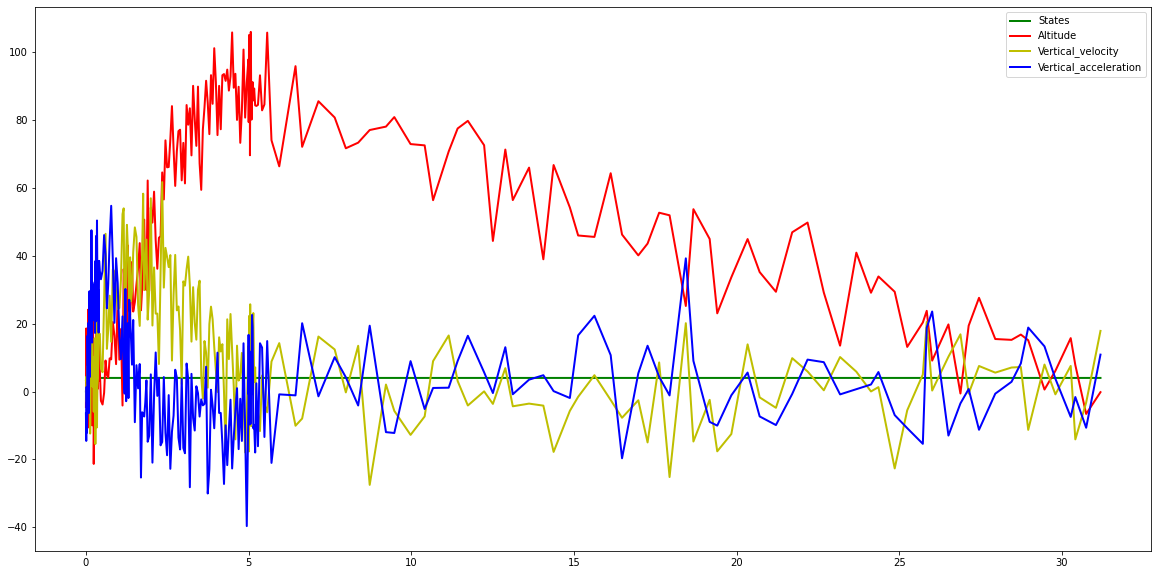

In [22]:
temp_df = data[['Altitude', "Vertical_velocity", "Vertical_acceleration"]]
noise = np.random.normal(3, 10, temp_df.shape)
noisy_df = temp_df + noise
noisy_df['Time'] = data['Time']
detect_apogee(df=noisy_df)
plot(df=noisy_df, path="../../Output/Figures/detectApogee3.jpeg")

In [23]:
q = 0.001
delta_time = 0.05;
delta_time_squared = (delta_time*delta_time)/2;
A = np.array([[1.0, delta_time, delta_time_squared], [0, 1.0, delta_time], [0, 0, 1]])
H = np.array([[1.0, 0.0, 0.0],[ 0.0, 0.0, 1.0]])
P = np.array([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
R = np.array([[0.5, 0.0], [0.0, 0.75]])
Q = np.array([[q, 0.0, 0.0], [0.0, q, 0.0], [0.0, 0.0, q]])
I = np.identity(3)
x_previous = np.array([[0.0], [0.0], [0.0]])
Y = np.array([[0.0], [0.0]])

In [24]:
new_altitude = []
new_acceleration = []
new_velocity = []

In [25]:
for altitude, az in zip(noisy_df['Altitude'], noisy_df['Vertical_acceleration']):
    Z = np.array([[altitude], [az]])
    
    x_predicted = np.dot(A, x_previous)
    p_predicted = np.dot(np.dot(A, P), np.transpose(A)) + Q
    K  = np.dot(np.dot(p_predicted, np.transpose(H)), np.linalg.inv((np.dot(np.dot(H, p_predicted), np.transpose(H)) + R)))
    x_previous = x_predicted + np.dot(K, Y)
    P = np.dot((I - np.dot(K, H)), p_predicted)
    Y = Z - np.dot(H, x_predicted)
    s = x_previous[0];
    v = x_previous[1];
    ac = x_previous[2];
    new_altitude.append(float(s))
    new_velocity.append(float(v))
    new_acceleration.append(float(ac))

In [26]:
new_altitude[1]

-1.8457929327458946

In [27]:
filtered_df = data[['Time']]
# filtered_df.insert(loc=0, column='Altitude', value=new_altitude)

filtered_df['Altitude'] = new_altitude
filtered_df['Vertical_acceleration'] = new_acceleration
filtered_df['Vertical_velocity'] = new_velocity
filtered_df.head()

/home/r0x6f736f646f/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/r0x6f736f646f/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/r0x6f736f646f/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,Time,Altitude,Vertical_acceleration,Vertical_velocity
0,0.00,0.000000,0.000000,0.000000
1,0.01,-1.845793,-2.367985,-0.596825
2,0.02,3.578816,-6.214309,1.057387
3,0.03,4.106500,-5.417770,1.239350
4,0.04,2.884416,-6.482497,-0.563673


/home/r0x6f736f646f/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


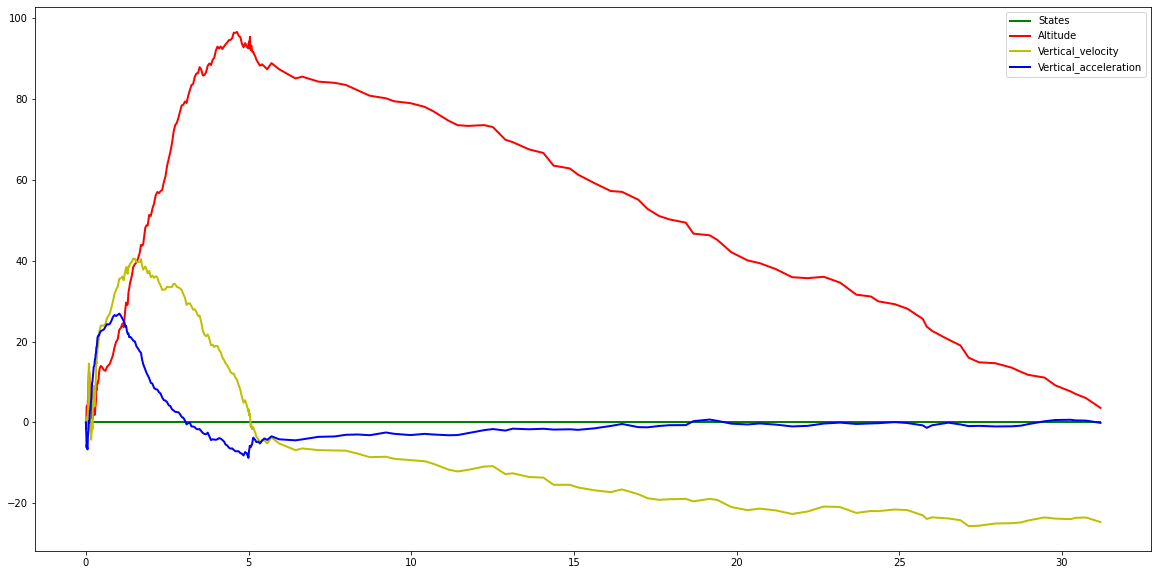

In [28]:
filtered_df['States'] = 0
plot(df=filtered_df, path="../../Output/Figures/detectApogee4.jpeg")

In [29]:
detect_apogee(filtered_df)

Apogee at : 5.0586


/home/r0x6f736f646f/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
